# Unsupervised Learning
uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention.

# K means clustering
KMeans clustering is an Unsupervised Machine Learning algorithm that does the clustering task. In this method, the 'n' observations are grouped into 'K' clusters based on the distance. The algorithm tries to minimize the within-cluster variance(so that similar observations fall in the same cluster).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
lst=[
("Rob",27,70000),
("Michael",29,90000),
("Mohan",29,61000),
("Ismail",28,60000),
("Kory",42,150000),
("Gautam",39,155000),
("David",41,160000),
("Andrea",38,162000),
("Brad",36,156000),
("Angelina",35,130000),
("Donald",37,137000),
("Tom",26,45000),
("Arnold",27,48000),
("Jared",28,51000),
("Stark",29,49500),
("Ranbir",32,53000),
("Dipika",40,65000),
("Priyanka",41,63000),
("Nick",43,64000),
("Alia",39,80000),
("Sid",41,82000),
("Abdul",39,58000)
]
data=pd.DataFrame(lst,columns=["Name","Age","Income($)"])
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [3]:
data=data.drop('Name',axis=1)
data

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


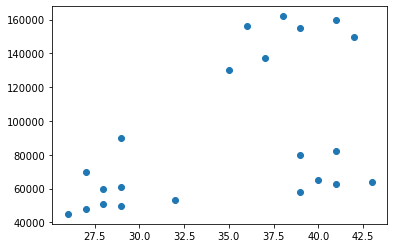

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data['Age'],data['Income($)'])
plt.show()

from the above graph we can manually classify that there are three clusters

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [9]:
km=KMeans(n_clusters=3)
km.fit_predict(data[['Age','Income($)']])
#km.fit(data[['Age','Income($)']])
#km.predict(data[['Age','Income($)']])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
data['clusters']=km.fit_predict(data[['Age','Income($)']])
data

,Age,Income($),clusters
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


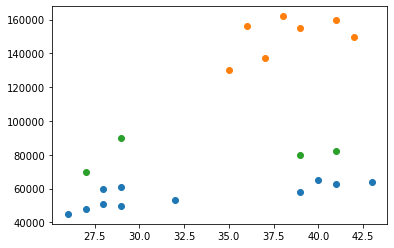

In [11]:
df1=data[data.clusters==0]
df2=data[data.clusters==1]
df3=data[data.clusters==2]
plt.scatter(df1['Age'],df1['Income($)'])
plt.scatter(df2['Age'],df2['Income($)'])
plt.scatter(df3['Age'],df3['Income($)'])
plt.show()

we can observe that it seems clusters are not perfectly classified.  
This occurs because Income is in ten thousands and age is in double digits   
so we need to convert age and income between 0 and 1

In [13]:
#convertin age between o and 1
mmscaler=MinMaxScaler()
#mmscaler.fit(data[['Age']])
#data.Age=mmscaler.transform(data[['Age']])
data.Age=mmscaler.fit_transform(data[['Age']])
data

,Age,Income($),clusters
0,0.058824,70000,2
1,0.176471,90000,2
2,0.176471,61000,0
3,0.117647,60000,0
4,0.941176,150000,1
5,0.764706,155000,1
6,0.882353,160000,1
7,0.705882,162000,1
8,0.588235,156000,1
9,0.529412,130000,1


In [81]:
#converting income between 0 and 1
mmscaler.fit(data[['Income($)']])
data['Income($)']=mmscaler.transform(data[['Income($)']])
data

,Age,Income($),clusters
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [82]:
#again performing kmeans 
km.fit_predict(data[['Age','Income($)']])

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [83]:
data['cluster2']=km.fit_predict(data[['Age','Income($)']])
data

,Age,Income($),clusters,cluster2
0,0.058824,0.213675,2,1
1,0.176471,0.384615,2,1
2,0.176471,0.136752,1,1
3,0.117647,0.128205,1,1
4,0.941176,0.897436,0,2
5,0.764706,0.940171,0,2
6,0.882353,0.982906,0,2
7,0.705882,1.000000,0,2
8,0.588235,0.948718,0,2
9,0.529412,0.726496,0,2


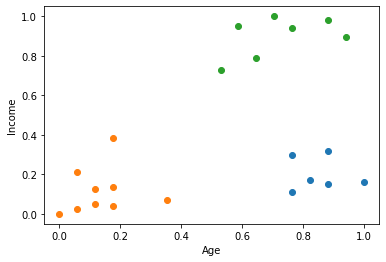

In [84]:
df1=data[data.cluster2==0]
df2=data[data.cluster2==1]
df3=data[data.cluster2==2]
plt.scatter(df1['Age'],df1['Income($)'])
plt.scatter(df2['Age'],df2['Income($)'])
plt.scatter(df3['Age'],df3['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [85]:
#getting centroids
centroids=km.cluster_centers_
centroids

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

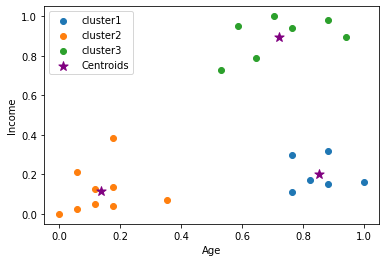

In [86]:
#plotting centroids in the plot
df1=data[data.cluster2==0]
df2=data[data.cluster2==1]
df3=data[data.cluster2==2]
plt.scatter(df1['Age'],df1['Income($)'],label='cluster1')
plt.scatter(df2['Age'],df2['Income($)'],label='cluster2')
plt.scatter(df3['Age'],df3['Income($)'],label='cluster3')
plt.scatter(centroids[:,0],centroids[:,1],color='purple',marker="*",label='Centroids',s=95)
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

Now the clusters are perfectly classified

for this problem we can manually decide that it has clusters but it not be possible for all problems

**Checking number of clusters**    
using Elbow method

In [87]:
#SSE-->sum of square error
sse=[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)
sse

C:\Users\Sharath chandra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.17299621932455464,
 0.13265419827245162,
 0.10188787724979426,
 0.08305638380794388]

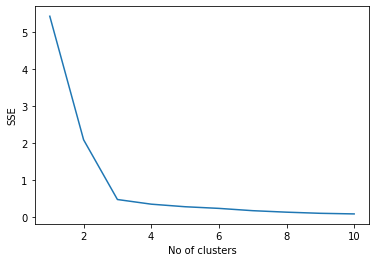

In [58]:
plt.plot(range(1,11),sse)
plt.xlabel("No of clusters")
plt.ylabel("SSE")
plt.show()

from the above graph, we can observe that the elbow is at 3  
Hence, it has 3 clusters

# Excercise

In [96]:
data=pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [97]:
data=data.drop(['petal.length','petal.width','variety'],axis=1)
data

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


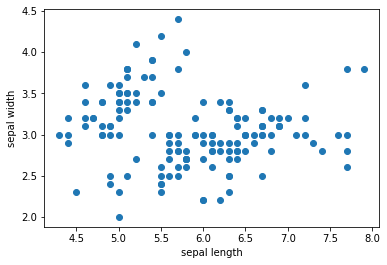

In [98]:
plt.scatter(data['sepal.length'],data['sepal.width'])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [99]:
#finding the number of clusters required
sse=[]
for k in range(1,11):
    km=KMeans(k)
    km.fit_predict(data[['sepal.length','sepal.width']])
    sse.append(km.inertia_)
sse

C:\Users\Sharath chandra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 27.990212038303703,
 20.979582587954685,
 17.37903436759318,
 14.881404428904426,
 12.845603230103235,
 11.320190170940176,
 9.583483192830561]

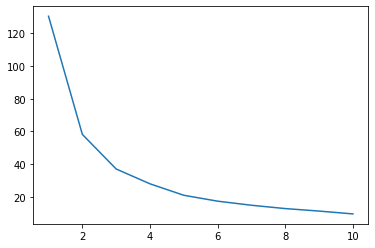

In [100]:
plt.plot(range(1,11),sse)
plt.show()

Elbow is at 3

In [103]:
km=KMeans(n_clusters=3)
data['clusters']=km.fit_predict(data[['sepal.length','sepal.width']])
data

,sepal.length,sepal.width,clusters
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,1
147,6.5,3.0,2
148,6.2,3.4,2


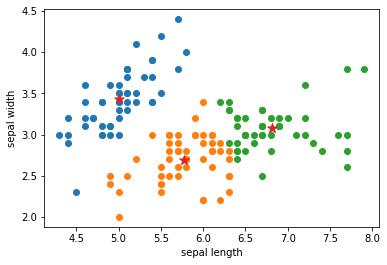

In [110]:
df1=data[data.clusters==0]
df2=data[data.clusters==1]
df3=data[data.clusters==2]
centroids=km.cluster_centers_
plt.scatter(df1['sepal.length'],df1['sepal.width'])
plt.scatter(df2['sepal.length'],df2['sepal.width'])
plt.scatter(df3['sepal.length'],df3['sepal.width'])
plt.scatter(centroids[:,0],centroids[:,1],marker="*",s=100)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# Naive Bayes    
1.Gaussian Naive Bayes   
2.Bernoulli Naive Bayes   
3.Multinomial Naive Bayes  

# Gaussian Naive Bayes
    Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.


# Bernoulli Naive Bayes
    It assumes that all our features are binary such that they take only two values. Means **0s** can represent “word does not occur in the document” and **1s** as "word occurs in the document" .

In [15]:
data=pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [19]:
#Extracting all the rows that has NaN values
data[data.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,Fare
5,0,3,male,NaN,8.4583
17,1,2,male,NaN,13.0000
19,1,3,female,NaN,7.2250
26,0,3,male,NaN,7.2250
28,1,3,female,NaN,7.8792
...,...,...,...,...,...
859,0,3,male,NaN,7.2292
863,0,3,female,NaN,69.5500
868,0,3,male,NaN,9.5000
878,0,3,male,NaN,7.8958


In [20]:
#getting the column names that has NaN values
data.columns[data.isna().any()]

Index(['Age'], dtype='object')

In [21]:
#getting number of NaN values in a row
data.iloc[5].isna().sum()

1

In [28]:
#getting number of NaN values in each column
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [61]:
#filling NaN values with mean values
data.Age=data.Age.fillna(data.Age.mean())
data.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
5,0,3,male,29.699118,8.4583
6,0,1,male,54.000000,51.8625
7,0,3,male,2.000000,21.0750
8,1,3,female,27.000000,11.1333
9,1,2,female,14.000000,30.0708


In [62]:
dummy=pd.get_dummies(data.Sex)
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [63]:
data1=pd.concat([data,dummy],axis=1)
data1

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.000000,7.2500,0,1
1,1,1,female,38.000000,71.2833,1,0
2,1,3,female,26.000000,7.9250,1,0
3,1,1,female,35.000000,53.1000,1,0
4,0,3,male,35.000000,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,0,1
887,1,1,female,19.000000,30.0000,1,0
888,0,3,female,29.699118,23.4500,1,0
889,1,1,male,26.000000,30.0000,0,1


In [64]:
data2=data1.drop('Sex',axis=1)
data2

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.000000,7.2500,0,1
1,1,1,38.000000,71.2833,1,0
2,1,3,26.000000,7.9250,1,0
3,1,1,35.000000,53.1000,1,0
4,0,3,35.000000,8.0500,0,1
...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1
887,1,1,19.000000,30.0000,1,0
888,0,3,29.699118,23.4500,1,0
889,1,1,26.000000,30.0000,0,1


In [65]:
x=data2.drop('Survived',axis=1)
x

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [66]:
y=data2.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
len(x_train)

668

In [68]:
#importing GaussianNB 
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [69]:
model.score(x_test,y_test)

0.7802690582959642

In [70]:
y_test.head(10)

858    1
164    0
68     1
637    0
379    0
789    0
281    0
26     0
148    0
347    1
Name: Survived, dtype: int64

In [71]:
model.predict(x_test[:10])

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [73]:
#getting the probability for each x_test value 
model.predict_proba(x_test[:10])

array([[0.05295222, 0.94704778],
       [0.97371354, 0.02628646],
       [0.04537042, 0.95462958],
       [0.97745877, 0.02254123],
       [0.98777225, 0.01222775],
       [0.70045462, 0.29954538],
       [0.98960145, 0.01039855],
       [0.98978856, 0.01021144],
       [0.97853738, 0.02146262],
       [0.057777  , 0.942223  ]])

# Multinomial Naive Bayes
Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

# Email spam detection

In [2]:
data=pd.read_csv(r"D:\programming languages\datasets\email_spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
#converting ham to 0 and spam to 1
data['Spam']=data['Category'].apply(lambda x: 1 if x=="spam" else 0)
data

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [5]:
x_train,x_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.2)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [7]:
cv=CountVectorizer()
model=MultinomialNB()

In [8]:
x_train_updated=cv.fit_transform(x_train)
cv.get_feature_names() #it will return all the words in the x_train

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '02',
 '0207',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07808',
 '07808247860',
 '07808726822',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701417012',
 '08701417012150p',

In [9]:
x_train_updated.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
x_train_updated.toarray().shape

(4457, 7820)

In [11]:
model.fit(x_train_updated,y_train)

MultinomialNB()

In [12]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = cv.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [13]:
x_test_updated=cv.transform(x_test)
model.score(x_test_updated,y_test)

0.9811659192825112

**Reducing all the steps such as transforming to countvector by simply using pipeline**

In [14]:
from sklearn.pipeline import Pipeline
pl=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('mnb',MultinomialNB())
])
pl.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mnb', MultinomialNB())])

In [15]:
pl.score(x_test,y_test)

0.9811659192825112

**Checking the accuracy using Bernoulli**

In [20]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train_updated,y_train)
model.score(x_test_updated,y_test)

0.9713004484304932

# Excercise

In [6]:
from sklearn.datasets import load_wine
dataset=load_wine()

In [7]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [13]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [14]:
data=pd.DataFrame(dataset.data,columns=dataset.feature_names)
data['target']=dataset.target
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [16]:
x=data.drop('target',axis=1)
y=data.target

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model2=MultinomialNB()
model1.fit(x_train,y_train)

GaussianNB()

In [27]:
model1.score(x_test,y_test)

0.9722222222222222

In [30]:
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.8333333333333334

we can coclude that for this problem GaussianNB is performing better than MutlinomialNB

#  Hyper parameter tuning
Finding the best algorithm with parameters suitable for the problem

In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
iris=load_iris()

In [12]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target)

In [19]:
cross_val_score(LogisticRegression(max_iter=1000),iris.data,iris.target,cv=3)

array([0.98, 0.96, 0.98])

In [16]:
cross_val_score(RandomForestClassifier(),x_train,y_train)

array([0.91304348, 0.91304348, 0.90909091, 1.        , 0.95454545])

In [23]:
cross_val_score(SVC(gamma='auto',kernel='linear',C=10),iris.data,iris.target)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [27]:
#trying all parameters in SVC in to get the best parameters suitable
kernels=['rbf','linear']
c_values=[1,5,10,20,30]
result={}
for k in kernels:
    for c in c_values:
        score=cross_val_score(SVC(kernel=k,C=c,gamma='auto'),iris.data,iris.target)
        result[k+"_"+str(c)]=np.average(score)
result

{'rbf_1': 0.9800000000000001,
 'rbf_5': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'rbf_30': 0.96,
 'linear_1': 0.9800000000000001,
 'linear_5': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666,
 'linear_30': 0.96}

**GridSearchCV**

In [37]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(SVC(gamma='auto'),{
    'C':[1,5,10,20,30],
    'kernel':['rbf','linear']
    },cv=5,return_train_score=False)
model.fit(iris.data,iris.target)
results=pd.DataFrame(model.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003330,0.000916,0.000586,0.001049,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000000,0.000000,0.001321,0.001677,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000643,0.000802,0.000831,0.001662,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000000,0.000000,0.000790,0.001581,5,linear,"{'C': 5, 'kernel': 'linear'}",1.000000,1.0,0.933333,0.966667,1.0,0.980000,0.026667,1
4,0.001058,0.001594,0.000789,0.001579,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
5,0.001671,0.002070,0.000835,0.001670,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,6
6,0.001773,0.002180,0.000000,0.000000,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,7
7,0.000000,0.000000,0.000833,0.001666,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,8
8,0.001995,0.001807,0.000000,0.000000,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.933333,1.0,0.960000,0.038873,9
9,0.000000,0.000000,0.000821,0.001641,30,linear,"{'C': 30, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.900000,1.0,0.960000,0.048990,9


In [38]:
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,5,rbf,0.980000
3,5,linear,0.980000
4,10,rbf,0.980000
5,10,linear,0.973333
6,20,rbf,0.966667
7,20,linear,0.966667
8,30,rbf,0.960000
9,30,linear,0.960000


In [39]:
#getting the best score
model.best_score_

0.9800000000000001

In [41]:
#getting the best parameters
model.best_params_

{'C': 1, 'kernel': 'rbf'}

**RandomizedSearchCV**

In [51]:
from sklearn.model_selection import RandomizedSearchCV
rmodel=RandomizedSearchCV(SVC(gamma='auto'),{
    'C':[1,5,10,20,30],
    'kernel':['rbf','linear']
    },cv=5,return_train_score=False,n_iter=2)#n_iter=2 --> it tries only two permutations and combinations
rmodel.fit(iris.data,iris.target)
results2=pd.DataFrame(rmodel.cv_results_)
results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001679,0.001600,0.001093,0.001572,linear,5,"{'kernel': 'linear', 'C': 5}",1.000000,1.0,0.933333,0.966667,1.0,0.98,0.026667,1
1,0.001602,0.001963,0.000000,0.000000,rbf,30,"{'kernel': 'rbf', 'C': 30}",0.966667,1.0,0.900000,0.933333,1.0,0.96,0.038873,2


In [52]:
results2[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,5,linear,0.98
1,30,rbf,0.96


In [53]:
rmodel.best_score_

0.9800000000000001

In [55]:
rmodel.best_params_

{'kernel': 'linear', 'C': 5}

**Difference between GridSearchCV and RandomizedSearchCV**               
The only difference between both the approaches is in grid search we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. Both are very effective ways of tuning the parameters that increase the model generalizability.

**Finding best model with best hyperparameters**

In [57]:
models={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,3,5,10,15,20,30],
            'kernel':['rbf','linear']
        }
    },
    'logistic regression':{
        'model':LogisticRegression(max_iter=1000),
        'params':{
            'C': [1,5,10]
        }
    },
    'random forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    }

}

In [61]:
scores=[]
for model_name,mp in models.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [62]:
data=pd.DataFrame(scores)
data

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,logistic regression,0.973333,{'C': 1}
2,random forest,0.966667,{'n_estimators': 5}


# Excerice

In [63]:
from sklearn.datasets import load_digits
digits=load_digits()

In [77]:
#getting best parameters in logistic regression manually
c_values=[1,5,10]
scores={}
for c in c_values:
    score=cross_val_score(LogisticRegression(max_iter=10000,C=c),digits.data,digits.target,cv=3)
    scores["c_"+str(c)]=np.average(score)
scores

{'c_1': 0.9287701725097385,
 'c_5': 0.9282136894824707,
 'c_10': 0.9271007234279355}

In [76]:
#getting best parameters for logistic regression using GridSearchCV
model=GridSearchCV(LogisticRegression(max_iter=10000),{
    'C':[1,5,10]
},return_train_score=False,cv=3)
model.fit(digits.data,digits.target)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [1, 5, 10]})

In [75]:
results=pd.DataFrame(model.cv_results_)
results[['param_C','mean_test_score']]

,param_C,mean_test_score
0,1,0.928214
1,5,0.927101
2,10,0.928214


In [78]:
#getting best parameters in svm manually
c_values=[1,10,20,30,40]
kernels=['rbf','linear']
scores={}
for k in kernels:
    for c in c_values:
        score=cross_val_score(SVC(gamma='auto',kernel=k,C=c),digits.data,digits.target,cv=5)
        scores[k+"_"+str(c)]=np.average(score)
scores

{'rbf_1': 0.448545341999381,
 'rbf_10': 0.47636645001547506,
 'rbf_20': 0.47636645001547506,
 'rbf_30': 0.47636645001547506,
 'rbf_40': 0.47636645001547506,
 'linear_1': 0.9476973073351903,
 'linear_10': 0.9476973073351903,
 'linear_20': 0.9476973073351903,
 'linear_30': 0.9476973073351903,
 'linear_40': 0.9476973073351903}

In [80]:
#getting best parameters in svm using GridSearchCV
model=GridSearchCV(SVC(gamma='auto'),{
    'kernel':['rbf','linear'],
    'C':[1,5,10,20,30]
},return_train_score=False,cv=5)
model.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 5, 10, 20, 30], 'kernel': ['rbf', 'linear']})

In [82]:
results=pd.DataFrame(model.cv_results_)
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.448545
1,1,linear,0.947697
2,5,rbf,0.476366
3,5,linear,0.947697
4,10,rbf,0.476366
5,10,linear,0.947697
6,20,rbf,0.476366
7,20,linear,0.947697
8,30,rbf,0.476366
9,30,linear,0.947697


In [83]:
model.best_params_

{'C': 1, 'kernel': 'linear'}

In [85]:
#getting best paramters for Random forest manually
n_estimators=[3,4,5,10]
scores={}
for n in n_estimators:
    score=cross_val_score(RandomForestClassifier(n_estimators=n),digits.data,digits.target,cv=5)
    scores[n]=np.average(score)
scores

{3: 0.809165892912411,
 4: 0.8514438254410399,
 5: 0.8592339832869081,
 10: 0.897632311977716}

In [90]:
#getting best paramters for Random forest using GridSearchCV
model=GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[3,4,5,10]
},return_train_score=False,cv=5)
model.fit(digits.data,digits.target)
results=pd.DataFrame(model.cv_results_)
results[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,3,0.803049
1,4,0.833080
2,5,0.867049
3,10,0.903193


In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
models = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [101]:
results=[]
for model_name,details in models.items():
    model=GridSearchCV(details['model'],details['params'],return_train_score=False,cv=3)
    model.fit(digits.data,digits.target)
    results.append({
        'model':model_name,
        'best_score':model.best_score_,
        'best_parameters':model.best_params_
    })
data=pd.DataFrame(results)
data

,model,best_score,best_parameters
0,svm,0.943795,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.886477,{'n_estimators': 10}
2,logistic_regression,0.919310,{'C': 1}
3,naive_bayes_gaussian,0.813578,{}
4,naive_bayes_multinomial,0.870896,{}
5,decision_tree,0.779633,{'criterion': 'gini'}


# Regularization
Regularization is used to get rid of problems such as Overfit and underfit   
1.L1 regularization    
2.L2 regularization

note : This will ignore all the warning messages       
import warnings    
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv(r"D:\programming languages\datasets\melbourne_house_price.csv")
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
#getting ununique values for each rows
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [7]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [8]:
dataset.shape

(34857, 15)

In [9]:
#checking for NaN values
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [11]:
#Handling Missing values
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [13]:
#Drop NA values of Price, since it's our predictive variable we won't impute it
dataset.dropna(inplace=True)
dataset.shape

(27244, 15)

In [14]:
#Let's one hot encode the categorical features
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#Let's bifurcate our dataset into train and test dataset
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)
reg.score(test_X, test_y)

0.1385368316156652

In [18]:
reg.score(train_X, train_y)

0.6827792395792723

Here training score is 68% but test score is 13.85% which is very low
Normal Regression is clearly overfitting the data, let's try other models

**Using Lasso (L1 Regularized) Regression Model**

In [19]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

C:\Users\Sharath chandra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326631542478295.2, tolerance: 796258688308222.8
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [20]:
lasso_reg.score(test_X, test_y)

0.6636111369404489

In [21]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

**Using Ridge (L2 Regularized) Regression Model**

In [22]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [23]:
ridge_reg.score(test_X, test_y)

0.6670848945194956

In [24]:
ridge_reg.score(train_X, train_y)

0.6622376739684328

We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too

# K Nearest Neighbours(KNN) classification
predict the given data belongs to which cluster based on nearest distance

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

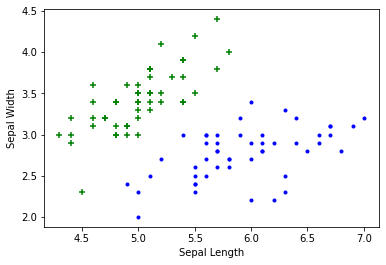

In [21]:
#Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

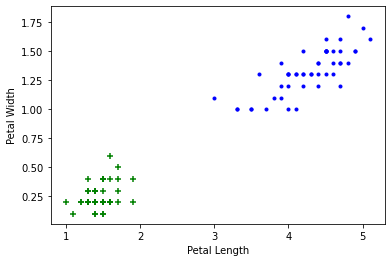

In [22]:
#Petal length vs Pepal Width (Setosa vs Versicolor)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
#Create KNN (K Neighrest Neighbour Classifier)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
knn.score(x_test,y_test)

0.9666666666666667

In [26]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [28]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

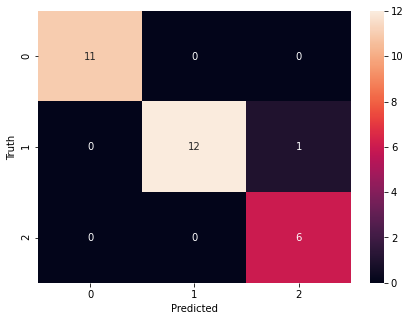

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
#Print classification report for precesion, recall and f1-score for each classes

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Excercise

In [32]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [33]:
x=digits.data
y=digits.target
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
knn.score(x_test,y_test)

1.0

In [36]:
from sklearn.metrics import confusion_matrix
y_predicted=knn.predict(x_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[9, 0, 0],
       [0, 9, 0],
       [0, 0, 6]], dtype=int64)

Text(42.0, 0.5, 'Truth')

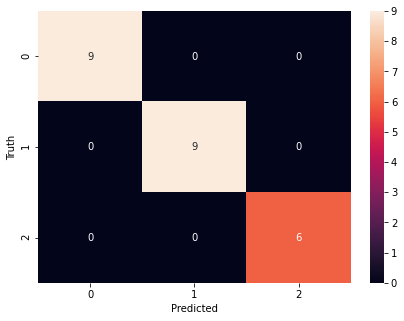

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



# Principal component Analysis(PCA)
knowing about the most important columns that has an impact on the target  

PCA is a process of figuring out most important features or principal components that has the most impact on the target variable.  

PCA is called as dimensionality reduction technique as it can reduce dimensions.

In [39]:
x=digits.data
y=digits.target
dataset=pd.DataFrame(x,columns=digits.feature_names)
dataset

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [40]:
dataset.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [41]:
dataset.shape

(1797, 64)

**Scaling the values**

In [42]:
from sklearn.preprocessing import StandardScaler
#we can also use MinMaxScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

Now you can observe that everything is in between -1 to 1  
MinMaxScaler converts from 0 to 1

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [44]:
#applying logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9722222222222222

**applying principle component analysis**

In [45]:
from sklearn.decomposition import PCA
pca=PCA(0.95)#this means that give all the columns that provide 95% of information
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 29)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9694444444444444

In [47]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

In [122]:
#getting all the columns in descending order of importance(below values are percentage of impact of each column on target)
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415])

In [123]:
#gettig number of columns
pca.n_components_

5

In [124]:
pca=PCA(n_components=5)#this means considering only top 5 important columns
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 5)

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8527777777777777

In [126]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415])

# Excercise

In [7]:
df=pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
df.shape

(918, 12)

In [14]:
#getting outliers by applying zscore
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [15]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [16]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [17]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


**Removing outliers**

In [22]:
#removing outliers of column RestingBP
df1=df[df.RestingBP<=(df.RestingBP.mean()+3*df.RestingBP.std())]
df1.shape

(911, 12)

In [25]:
#removing outliers of column Cholestrol
df2=df1[df1.Cholesterol<=(df1.Cholesterol.mean()+3*df1.Cholesterol.std())]
df2.shape

(908, 12)

In [33]:
#removing the outliers of Oldpeak column
df3=df2[df2.Oldpeak<=(df2.Oldpeak.mean()+3*df2.Oldpeak.std())]
df3.shape

(902, 12)

In [34]:
df3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [35]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [43]:
#one hot encoding
df5=pd.get_dummies(df4,drop_first=True)
df5

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,1,0,1,0,0


In [44]:
x=df5.drop('HeartDisease',axis=1)
y=df5.HeartDisease

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=5)

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8287292817679558

**Use PCA to reduce dimensions**

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_pca=pca.fit_transform(x_scaled)
pca.explained_variance_ratio_

array([0.22116083, 0.11112485, 0.0978772 , 0.09148035, 0.08228342])

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=5)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8176795580110497